## Исследование данных о российском кинопрокате

Заказчик этого исследования — Министерство культуры Российской Федерации.
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос - насколько такие фильмы интересны зрителю.
Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Цель исследования:**
1. Изучить рынок российского кинопроката и выявить текущие тренды. 
2. Изучить фильмы, которые получили государственную поддержку. 
3. Ответить на вопрос - насколько фильмы, которые получили государственную поддержку, интересны зрителю.

**Ход исследования:**

Данные я получу из файлов /datasets/mkrf_movies.csv — данные о прокатных удостоверениях и /datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор и предобработка данных.

Сначала я открытию файлы с данными и объединеню их в один датафрейм. Затем я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа.

*Таким образом, моё исследование пройдёт в семь этапов:*

1. Открытие файлов с данными и объединение их в один датафрейм.
2. Обзор данных.
3. Предобработка данных (обработка пропусков и дубликатов, изменение типов данных).
4. Добавление новых столбцов:
 - Столбец с информацией о годе проката;
 - Столбец с именем и фамилией главного режиссёра;
 - Столбец с основным жанром фильма;
 - Столбец, с рассчетом какую долю от общего бюджета фильма составляет государственная поддержка.
5. Проведение исследовательского анализа данных:
 - Сколько фильмов выходило в прокат каждый год;
 - Какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Как эта доля менялась по годам;
 - Вывод о том, какой период полнее всего представлен в данных;
 - Как менялась динамика проката по годам;
 - Сводная таблица со средней и медианной суммой сборов для каждого года. Сравнение значений и выводы;
 - Влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год; 
 - Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, с чем это может быть связано?
6. Исследование фильмов, получивших государственную поддержку.
7. Общие выводы по исследованию.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
#импортируем необходимые библиотеки:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings #импортируем библиотеку управления предупреждениями


warnings.filterwarnings('ignore') #отключаем предупреждения

In [2]:
#для подгрузки данных используем конструкцию try-except
#она поможет избежать потенциальных ошибок при загрузке данных, связанных с некорректным указанием путей:

try:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    mkrf_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

**Описание данных**

Таблица **mkrf_movies** содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
 - title — название фильма;
 - puNumber — номер прокатного удостоверения;
 - show_start_date — дата премьеры фильма;
 - type — тип фильма;
 - film_studio — студия-производитель;
 - production_country — страна-производитель;
 - director — режиссёр;
 - producer — продюсер;
 - age_restriction — возрастная категория;
 - refundable_support — объём возвратных средств государственной поддержки;
 - nonrefundable_support — объём невозвратных средств государственной поддержки;
 - financing_source — источник государственного финансирования;
 - budget — общий бюджет фильма (уже включает в себя полный объём государственной поддержки);
 - ratings — рейтинг фильма на КиноПоиске;
 - genres — жанр фильма.

Таблица **mkrf_shows** содержит сведения о показах фильмов в российских кинотеатрах.
 - puNumber — номер прокатного удостоверения;
 - box_office — сборы в рублях.

In [3]:
#выведем размеры датафреймов на экран:
print('Количество строк в датафрейме mkrf_movies:', mkrf_movies.shape[0],
      '\nКоличество столбцов в датафрейме mkrf_movies: ', mkrf_movies.shape[1])

Количество строк в датафрейме mkrf_movies: 7486 
Количество столбцов в датафрейме mkrf_movies:  15


In [4]:
print('Количество строк в датафрейме mkrf_shows:', mkrf_shows.shape[0],
      '\nКоличество столбцов в датафрейме mkrf_shows: ', mkrf_shows.shape[1])

Количество строк в датафрейме mkrf_shows: 3158 
Количество столбцов в датафрейме mkrf_shows:  2


In [5]:
#выведем основную информацию о датафреймах на экран:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
#выведем первые 5 строчек датафреймов на экран:
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [8]:
pd.options.display.float_format = '{:,.2f}'.format

In [9]:
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


Можно заметить, что в некоторых столбцах основного датафрейма **mkrf_movies** находятся пропуски. Количество строк первого и второго датафрейма отличаются - первый больше. Кроме того, многие столбцы первого датафрейма имеют тип object, в том числе и столбец *puNumber* - номер прокатного удостоверения, по которому мы будем объединять датафреймы. Исправим тип этого столбца. Всё остальное исправим наследующем шаге - предобработка данных.

In [10]:
#посмотрим уникальные значения в столбце puNumber:
sorted(mkrf_movies['puNumber'].unique())

[' 111004112',
 '111000110',
 '111000111',
 '111000112',
 '111000113',
 '111000114',
 '111000115',
 '111000116',
 '111000117',
 '111000118',
 '111000119',
 '111000210',
 '111000211',
 '111000212',
 '111000213',
 '111000214',
 '111000215',
 '111000216',
 '111000217',
 '111000218',
 '111000219',
 '111000310',
 '111000311',
 '111000312',
 '111000313',
 '111000314',
 '111000315',
 '111000317',
 '111000318',
 '111000319',
 '111000410',
 '111000411',
 '111000412',
 '111000413',
 '111000414',
 '111000415',
 '111000416',
 '111000417',
 '111000418',
 '111000419',
 '111000510',
 '111000511',
 '111000512',
 '111000513',
 '111000514',
 '111000515',
 '111000516',
 '111000517',
 '111000518',
 '111000519',
 '111000610',
 '111000611',
 '111000612',
 '111000613',
 '111000614',
 '111000615',
 '111000616',
 '111000617',
 '111000618',
 '111000619',
 '111000710',
 '111000711',
 '111000712',
 '111000714',
 '111000715',
 '111000716',
 '111000717',
 '111000718',
 '111000719',
 '111000810',
 '111000811',
 '111

In [11]:
mkrf_movies['puNumber'].sort_values()

804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
4355     226017410
3992     226019110
1011     231001012
5249     231001111
1797           нет
Name: puNumber, Length: 7486, dtype: object

In [12]:
mkrf_movies.sort_values(by='puNumber').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
3962,Небесный тихоход (новая цветная версия),111000110,2010-01-14T12:00:00.000Z,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.0,"комедия,военный"
4768,И не было лучше брата,111000111,2011-01-13T12:00:00.000Z,Художественный,"ООО ""Ибрус"" при поддержке Киностудии ""Азербай...",Россия - Азербайджан,М.Ибрагимбеков,"М.Ибрагимбеков, А.Швыдкой, Д.Шуфутинский",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,детектив
729,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112,2012-01-16T12:00:00.000Z,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия"
1128,Тайна перевала Дятлова,111000113,2013-01-17T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"ужасы,фантастика"


In [13]:
mkrf_movies['puNumber'].value_counts().head(20)

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
121015211    1
121008811    1
221072611    1
111003111    1
121004711    1
221049611    1
221049511    1
221049411    1
121004511    1
124000611    1
121015411    1
121014011    1
121014911    1
121011311    1
121011411    1
Name: puNumber, dtype: int64

In [14]:
#ничего не понятно, но очень интересно)
#попробуем отфильровать не числовые значения в столбце puNumber:

mkrf_movies[~mkrf_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В строке 804 видим пробел - в уникальных значениях этот номер прокатного удостоверения стоит первым. Т.к. пробел вначале строки, для его удаления удобно использовать функцию strip(). В строке 1797 пока не будем удалять "Курбан-роман")), заменим "нет" нулем. Затем приведем строки к целым числам функцией to_numeric().

In [15]:
mkrf_movies.loc[804, 'puNumber'] = mkrf_movies.loc[804, 'puNumber'].strip()
mkrf_movies.loc[1797, 'puNumber'] = '0'

In [16]:
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'])

In [17]:
#проверим теперь тип данных в столбце puNumber таблицы mkrf_movies:
mkrf_movies['puNumber'].dtype

dtype('int64')

Убедившись, что тип данных в обоих датафреймах в столбце *puNumber* совпадает, мы можем добавить в датафрейм с фильмами сведения о сборах в рублях.

In [18]:
#объединим таблицы по столбцу puNumber методом merge():
data = mkrf_movies.merge(mkrf_shows, how='left')

In [19]:
#посмотрим, добавился ли столбец:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Вывод
Столбец добавлен корректно, можно приступать к предобработке данных.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Итак, пойдем сверху вниз:
   - для столбца **title** тип **object** является корректным, он содержит строковые значения;
   - для столбца **puNumber** тип **int64** - целые числа, отлично (уже поработали с этим столбцом);
   - для столбца **show_start_date** тип **object** не является корректным, т.к. в столбце содержится информация по датам премьер фильмов, переведем его в тип **datetime**; 
   - для столбцов **type, film_studio, production_country, director , producer** тип **object** также является корректным, они содержат строковые значения;
   - для столбца **age_restriction** заменим категориальные значения на количественные для удобства, приведем тип к целочисленному **int64**;
   - для столбцов **refundable_support, nonrefundable_support, budget** тип **float64** является корректным, к тому же там много пропусков, поэтому оставим тип **float64**;
   - для столбца **financing_source** тип **object** является корректным, он содержит строковые значения;
   - для столбца **ratings** тип **object** не является корректным, т.к. в столбце содержится информация по рейтингу, в идеале тип столбца должен быть **float64** - вещественные числа, посмотрим данный столбец подробнее;
   - для столбца **genres** тип **object** является корректным, он содержит строковые значения;
   - для столбца **box_office** тип **float64** является корректным.

In [21]:
#тут посмотрела для собственного понимания строки с не пустыми и не нулевыми значениями в столбце refundable_support:
data[(~data['refundable_support'].isna())&(data['refundable_support']!=0)].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1870,А зори здесь тихие..._,111002915,2015-03-16T12:00:00.000Z,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,"50,000,000.00","100,000,000.00","220,588,394.00",Фонд кино,8.5,"драма,военный,история","249,166,767.70"
1987,Елки Лохматые,111023114,2014-12-10T12:00:00.000Z,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,"26,000,000.00","30,000,000.00","80,000,000.00",Фонд кино,5.0,"семейный,комедия","121,225,633.80"
2005,Снежная Королева 2: Перезаморозка,114000214,2014-11-13T12:00:00.000Z,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",«0+» - для любой зрительской аудитории,"30,000,000.00","40,000,000.00","252,489,571.00",Фонд кино,6.5,"мультфильм,фэнтези,приключения","313,489,846.50"
2142,Территория,111000515,2015-01-27T12:00:00.000Z,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,«12+» - для детей старше 12 лет,"30,000,000.00","30,000,000.00","500,000,000.00",Фонд кино,6.8,"детектив,фэнтези,триллер","72,578,317.40"
2288,12 месяцев. Новая сказка,111014414,2014-10-16T12:00:00.000Z,Художественный,"ООО ""Киностудия ""Никола-фильм"", ООО ""Инвестмен...",Россия,Д.Елеонский,И.Каленов,«0+» - для любой зрительской аудитории,"15,000,000.00","5,000,000.00","90,120,000.00",Фонд кино,3.8,"семейный,фэнтези","32,244,810.00"


In [22]:
#переведем show_start_date в тип datetime:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
#посмотрим теперь его формат:
data['show_start_date'].dtype

datetime64[ns, UTC]

In [23]:
#посмотрим уникальные значения в столбце ratings:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Часть данных хранится в формате процентов, хотя для рейтинга используют десятибальную систему. Можно было бы предположить, что проценты в этих строках это доли от 10 баллов и привести их к числу, посмотрим какие фильмы соответствуют рейтингу в процентах. 

In [24]:
#создадим список значений, которые подразумевают неизвестный рейтинг:
unknown_ratings = ['99%', '28%', '97%','83%', '64%',
                  '91%', '94%', '62%', '79%', '90%',
                  '19%', '88%', '89%', '98%']

In [25]:
unknown_ratings

['99%',
 '28%',
 '97%',
 '83%',
 '64%',
 '91%',
 '94%',
 '62%',
 '79%',
 '90%',
 '19%',
 '88%',
 '89%',
 '98%']

In [26]:
#выведем на экран отфильтованную таблицу со значениями % в столбце ratings:
data.query('ratings in @unknown_ratings').sort_values(by='ratings')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3431,Наурыз,131000217,2017-03-09 12:00:00+00:00,Художественный,Эс Джи,Республика Казахстан,Аскар Бисембин,"Олег Головашкин, Алмас Султангазин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,19%,комедия,"37,960.00"
811,От винта!,114000212,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740.00"
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.70"
7159,Анна Каренина. Интимный дневник,111013919,2019-10-23 12:00:00+00:00,Художественный,"ООО ""РТВ""",Россия,Ю.Грымов,Ю.Грымов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,79%,драма,"182,882.50"
2680,Год Белого Слона,111003915,2015-04-08 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ЮГ""",Россия,Ю.Грымов,П.Поляков,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,79%,семейный,NaN
3446,Короткие истории о любви - 4,126006316,2016-12-30 12:00:00+00:00,Прочие,"Нетворг Айлэнд Телевижн, Магнетфильм, Шорткатс...",Великобритания - Аргентина - США - Франция - Р...,"Д.Адар, П.Антохин, М.Биасин, А.Бурунова, К.Кол...","Д.Адар, Д.Амсон, П.Антохин, А.Армстронг, С.Бил...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,"2,266,408.00"
5455,Вечный холод,111006417,2017-08-28 12:00:00+00:00,Художественный,"ЗАО ""Производственный комплекс ""ГЛАВКИНО"", ООО...",Россия,А.Мигачев,И.Бачурин,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,"фэнтези,боевик,триллер",NaN
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,"1,429,859.00"
5332,Добыча.,121009411,2011-06-15 12:00:00+00:00,Художественный,Афтер Дарк Филмз,США,Патрик Сиверсен,"Закари Ти Брайан, Кристофер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,88%,"фантастика,боевик,триллер",NaN


Прошлась по нескольким фильмам на Кинопоиске с рейтингом в таблице 99% и у них отнюдь рейтинг не 9.9. Поэтому делаю вывод - возможно эти проценты это доля количества отзывов, необходимых для оценки. Считаю корректным заменить эти данные на Nan.

In [27]:
#присваиваем пустые значения там, где были %:
data.loc[data['ratings'].isin(unknown_ratings), 'ratings'] = np.NaN

In [28]:
#посмотрим теперь на уникальные значения в столбце ratings:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

In [29]:
#приведем значения в столбце ratings в числовые:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Вывод
1. Тип данных в столбце puNumber изменили на int64 - целые числа;
2. Тип данных в столбце show_start_date изменили на datetime;
3. В столбце ratings заменили не корректные значения в % на Nan и изменили тип данных на float64.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [31]:
#посмотрим количество пропусков в столбцах таблицы:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [32]:
#посмотрим количество пропусков в столбцах таблицы в процентах (это меня ревьюер предыдущего проекта научил))):
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


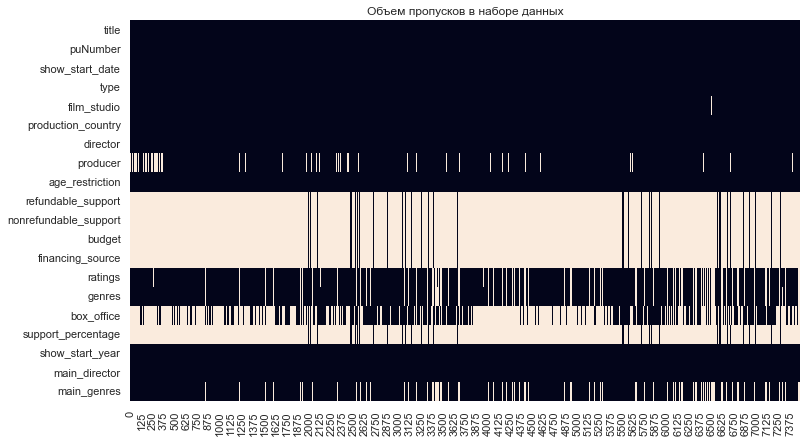

In [139]:
sns.heatmap(data.isna().transpose(), cbar=False).set_title('Объем пропусков в наборе данных')
sns.set(rc={'figure.figsize':(20,15)})

 - В столбце film_studio - 18 пропусков;
 - В столбце production_country всего 2 пропуска, эти картины из России;
 - В столбце director всего 9 пропусков;
 - В столбце producer - 568 пропусков;
 - Пропущена значительная часть данных в refundable_support, nonrefundable_support, budget, financing_source. Но в описании указано, что эти данные указаны только для тех фильмов, которые получили государственную поддержку. Также бюджет этих фильмов указан с учетом государственной поддержки;
 - В столбце genres и ratings по 976 и 996 соответственно;
 - В столбце box_office 4328 пропусков, но этот столбец добавлен с учетом того, что содержит сведения о показах фильмов в российских кинотеатрах.

Обработаем пропуски в столбце **film_studio:**

In [34]:
#посмотрим пропуски в столбце film_studio:
data[data['film_studio'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видим, что тут преобладает авторское кино. Скорее всего здесь нет никакой ошибки. Кино спонсировала не студия-производитель, а сами авторы (продюсер, режиссер). Выбивается только "Мульт личности. Выпуск 5", в котором пропуски и в других столбцах - страна, режиссер, продюсер. Посмотрим есть ли другие выпуски этого ужасн... Ой, прекрасного сериала)) в датафрейме:

In [35]:
#отфильтруем по наименованию (столбец title), строки содержащие "Мульт личности":
data[data['title'].str.contains('Мульт личности')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Таковых не оказалось. Кроме того, в срезе с пропусками в столбце film_studio отсутствуют фильмы с господдержкой, которые нам интересны для дальшейшего исследования. Можно было бы удалить эти строки, т.к. процент от общего датафрейма мизерный и вряд ли повляет на результат исследования, однако, оставим пока эти пропуски как есть, возможно данные по годам нам понадобятся в следующих исследованиях.

Обработаем пропуски в столбце **production_country:**

In [36]:
#посмотрим на пропуски в столбце production_country:
data[data['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Видим наш любимый Мульт личности и Ералаш, угадаем страну-производителя с первого раза)

In [37]:
#заменим пропуски в этих двух строках в столбце production_country на значение 'Россия':
data['production_country'] = data['production_country'].fillna(value='Россия')

In [38]:
#проверим прописалась ли страна-производитель:
data[(data['title'].str.contains('Ералаш'))|(data['title'].str.contains('Мульт личности'))]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
729,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112,2012-01-16 12:00:00+00:00,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
1010,"Детский юмористический киножурнал ""Ералаш"", вы...",111001613,2013-05-16 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, С.Морозов, В.Панжев, Н.Репина, К.Се...","ООО ""Продюсерский центр ЕРАЛАШ""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.20,"детский,комедия","3,545.00"
1282,"Детский юмористический киножурнал ""Ералаш"", вы...",111008613,2013-10-18 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"И.Белостоцкий, В.Панжев, А.Щеглов, Н.Хлопецкая...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","3,580.00"
2001,"Детский юмористический киножурнал ""Ералаш"", вы...",111006314,2014-06-19 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, С.Морозов, В.Панжев, Н.Репина, К.Се...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
2144,"Детский юмористический киножурнал ""Ералаш"", вы...",111002515,2015-03-12 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"В.Панжев, Е.Соколов, А.Щеглов, Г.Курлаев, Н.Ре...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
2360,"Детский юмористический киножурнал ""Ералаш"", вы...",111014014,2014-10-10 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"И.Белостоцкий, Р.Фрунтов, А.Зеленков, Е.Юликов...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",165.00
3120,"Детский юмористический киножурнал ""Ералаш"", вы...",111021215,2015-12-22 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, В.Панжев, Е.Соколов, С.Морозов и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
3214,"Детский юмористический киножурнал ""Ералаш"", вы...",111012816,2016-08-17 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, Е.Морозова, В.Панжев, Г.Курлаев и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","457,576.00"
4017,"Детский юмористический киножурнал ""Ералаш"". В...",111002011,2011-03-10 12:00:00+00:00,Художественный,"ООО ""Ералаш""",Россия,"М.Рязанова, В.Панжев, Г.Курлаев, М.Сулейманова...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","2,325.00"


Обработаем пропуски в столбце **director:**

In [39]:
#посмотрим пропуски в столбце director:
data[data['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


In [40]:
#заменим пропуск в фильме "Мульт личности" в director на значение взятое с Кинопоиска - 'Василий Пичул, Юрий Владовский':
data.loc[4441, 'director'] = 'Василий Пичул, Юрий Владовский'

Остальные позиции не имеют режиссера, т.к. это концерты или документальные фильмы, которые отсутствуют на Кинопоиске, либо отстутствует информация о режиссере на кинопоиске, либо режиссер отсутствует как таковой). Оставим эти строки как есть.
Также оставим и пропуски в столбцах producer, genres, ratings. Пропусков слишком много, данных для заполнения у нас нет, на дальнейшее исследование они не повлияют.

#### Вывод
Обработали пропуски там, где это было возможным: добавили страну-производителя в столбце **production_country** по 2 позициям, режиссера в 1 позиции столбца **director**. Остальные пропуски оставили как есть, т.к. их слишком много, данных для заполнения у нас нет, на дальнейшее исследование они не повлияют.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим наличие явных дубликатов:

In [41]:
print('Явных дубликатов в датафрейме:', data.duplicated().sum())

Явных дубликатов в датафрейме: 0


In [42]:
#посчитаем количество уникальных значений по столбцам:
data.nunique()

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4812
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    80
genres                    742
box_office               2938
dtype: int64

In [43]:
#выведем перве 10 строк с дубликатами в наименовании фильмов: 
data.loc[data['title'].duplicated(keep=False)].sort_values(by='title').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
4852,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма",NaN
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма","18,439,240.55"
1494,13-й район: Кирпичные особняки,121008314,2014-04-25 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"боевик,криминал",750.00
1493,13-й район: Кирпичные особняки,221033314,2014-08-20 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"боевик,криминал",NaN
4107,13.,221123710,2010-10-25 12:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"триллер,драма,криминал",NaN
4307,13.,121018110,2010-09-30 12:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"триллер,драма,криминал",NaN


Повторы в столбце **title** можно объяснить тем, что один и тот же фильм могут начать показывать в разное время, т.е. они выходили в прокат неоднократно, и видимо поэтому ему выдавались разные номера прокатных удостоверений.

In [44]:
#посмотрим дубли в столбце с прокатными удостоверениями:
data[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


2 дубликата в номерах прокатных удостоверений, это скорее всего связано с тем, что под одним удостоверением выходило в прокат несколько фильмов. Может, это фильмы разделенные на 2 эпизода или фильмы, которые выходили друг за другом. В реестре на официальном сайте так все и есть: под одним номером - два фильма. Оставим эти строки как есть.

#### Вывод
Полностью повторяющихся строк нет. Есть дубликаты в названиях фильмов - столбец **title**, это связано с неоднократной выдачей прокатных удостоверений (фильмы выходили в разное время). Исправить это не можем, так как в этом случае утеряется номер прокатного удостоверения. Есть 2 дубликата в номерах прокатных удостоверений - столбец **puNumber**, это скорее всего связано с тем, что под одним удостоверением выходило в прокат несколько фильмов. Может, это фильмы разделенные на 2 эпизода или фильмы, которые выходили друг за другом. В реестре на официальном сайте так все и есть: под одним номером - два фильма. Оставим эти строки как есть.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [45]:
#выведем уникальные значения столбца type:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Видим что встречаются пробелы перед значением в данном столбце. Исправим это:

In [46]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [47]:
#также для удобства приведем все к нижнему регистру:
data['type'] = data['type'].str.lower()
data['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

In [48]:
#посмотрим уникальные значения в столбце age_restriction:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [49]:
#заменим категориальные значения столбца age_restriction на количественные для удобства:
data['age_restriction'].replace(
    to_replace = ['«18+» - запрещено для детей', '«16+» - для детей старше 16 лет', 
                  '«12+» - для детей старше 12 лет', '«6+» - для детей старше 6 лет',
                  '«0+» - для любой зрительской аудитории'],
    value = ['18','16','12','6','0'],
    inplace = True
)

data['age_restriction'] = data['age_restriction'].astype('int64')

In [50]:
data['age_restriction'].unique()

array([18,  6, 12, 16,  0], dtype=int64)

In [51]:
#посмотрим уникальные значения в столбце financing_source:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [52]:
#приведем все к нижнему регистру:
data['financing_source'] = data['financing_source'].str.lower()
data['financing_source'].unique()

array([nan, 'министерство культуры', 'фонд кино',
       'министерство культуры, фонд кино'], dtype=object)

In [53]:
#посмотрим уникальные значения в столбце genres:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

#### Вывод
1. Убрали пробелы перед значением в столбце type и привели все символы к нижнему регистру;
2. В столбце age_restriction заменили категориальные значения на количественные и привели к целочисленному типу - int64;
3. Привели все символы к нижнему регистру в столбце financing_source;
4. В столбце genres видим повторяющиеся значения в совокупности с другими, например: "драма,триллер", "драма,военный". Оставим как есть.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Итак, столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Проверим есть ли кинокартины, у которых бюджет меньше суммы возвратных и невозвратных средств:

In [54]:
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16,0.00,"23,000,000.00",0.00,"министерство культуры, фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16,0.00,"75,000,000.00",0.00,фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12,"10,000,000.00","70,000,000.00",0.00,фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16,"20,000,000.00",0.00,0.00,фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,6,"60,000,000.00","100,000,000.00",0.00,фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18,0.00,"59,000,000.00",0.00,фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16,0.00,"35,000,000.00",0.00,фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12,0.00,"6,000,000.00",0.00,министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16,"19,000,000.00","51,000,000.00",0.00,фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12,0.00,"250,000,000.00",0.00,фонд кино,5.60,фантастика,"1,038,321,489.00"


Такие картины есть. Исправим в них бюджет. Выясним в каком объёме от общего бюджета обычно оказывалась господдержка:

In [55]:
data['support_percentage'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

support_percentage = data['support_percentage'].median()

print('Медиана доли участия государства в бюджете составляет:', support_percentage)

Медиана доли участия государства в бюджете составляет: 0.6140376284219444


Исправим бюджет на сумму поддержки с учетом медианны доли участия государства в бюджете. Для этого напишем функцию:

In [56]:
def correct_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return (row['refundable_support'] + row['nonrefundable_support']) / support_percentage
    return row['budget']

In [57]:
data['budget'] = data.apply(correct_budget, axis=1)

In [58]:
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage


In [59]:
#посмотрим на 1 примере как сработала функция:
data[data['title'] == 'Дуxless 2']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16,0.00,"75,000,000.00","122,142,351.75",фонд кино,6.60,драма,"446,163,511.00",inf


Функция сработала корректно.

#### Вывод
Заменили нулевые значения бюджета, где сумма поддержки превышала значение бюджета.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [60]:
#содадим новый столбец с годом проката:
data['show_start_year'] = data['show_start_date'].dt.year
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2"
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [61]:
#напишем функцию для добавления столбцов с именем и фамилией главного режиссёра и основным жанром фильма: 
def add_main(data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0])
    return data

In [62]:
#применим функцию к столбцам с режиссером и жанрами:
data = add_main(data, ['director', 'genres'])
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,show_start_year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7478 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   int64              
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Функция сработала корректно.

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Посчитали какую долю от общего бюджета фильма составляет государственная поддержка ранее и добавили в столбец **support_percentage**.

#### Вывод
- Выделили год из даты премьеры и добавили в новый столбец;
- Выделили первого в списке режиссера и первый жанр, значения добавили в новые столбцы;
- Посчитали долю государственной поддержки по отношению к бюджету.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [64]:
#сгруппируем таблицу из столбцов со сборами box_office и годом старта показа:
data_pivot = data.loc[data['box_office'].notna(), ['show_start_year', 'box_office']] \
                .groupby('show_start_year') \
                .agg(['count', 'sum', 'mean', 'median'])

data_pivot.columns = data_pivot.columns.get_level_values(1)

data_pivot

,count,sum,mean,median
show_start_year,,,,
2010,105,"2,428,654.00","23,130.04","1,700.00"
2011,109,"14,102,765.00","129,383.17","3,000.00"
2012,128,"6,955,423.00","54,339.24","5,660.00"
2013,184,"29,799,706.20","161,954.92","3,522.50"
2014,279,"7,444,951,859.20","26,684,415.27","18,160.00"
2015,465,"39,497,365,196.40","84,940,570.31","4,920,933.00"
2016,526,"47,866,299,741.91","91,000,569.85","3,846,679.41"
2017,357,"48,563,707,217.51","136,032,793.33","9,968,340.00"
2018,475,"49,668,403,134.32","104,565,059.23","8,891,102.21"


In [65]:
#посчитаем долю фильмов для которых есть информация о сборах (выведем значение сразу в %):
print(f'Доля фильмов, для которых есть информация о сборах: {data.box_office.notna().mean():.2%}')

Доля фильмов, для которых есть информация о сборах: 42.19%


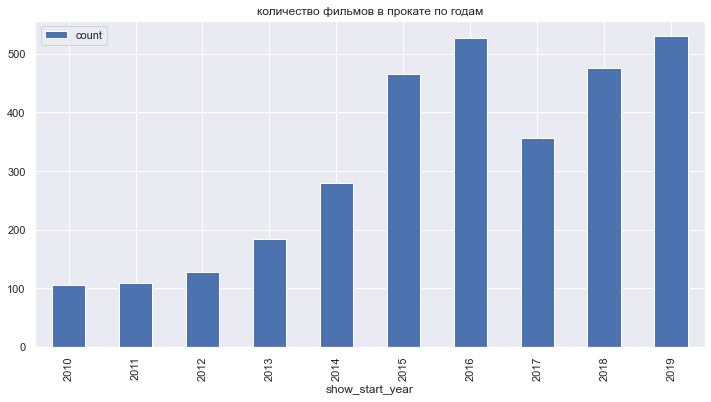

In [66]:
#построим столбчатый график, показывающий изменение количества фильмов в прокате по годам:  
data_pivot.plot(title='количество фильмов в прокате по годам', kind='bar', y='count', grid=True, figsize=(12,6))
plt.show()

Общая динамика выхода фильмов по годам является положительной. В 2017 году заметен небольшой спад, затем снова рост. Больше всего фильмов вышло в 2016 и 2019 гг.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

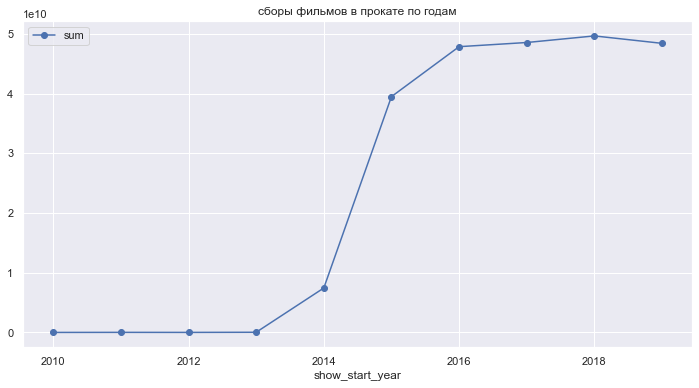

In [67]:
#посторим график динамики сборов фильмов в прокате по годам:
data_pivot.plot(title='сборы фильмов в прокате по годам', kind='line', style='o-', y='sum', grid=True, figsize=(12,6))
plt.show()

In [68]:
#т.к. года в сводной таблице стали индексами, то можем получить мин и макс значения по годам методами idxmin() и idxmax():
print(f"В {data_pivot['sum'].idxmin()} году сумма сборов была минимальной, а в {data_pivot['sum'].idxmax()} максимальной.")

В 2010 году сумма сборов была минимальной, а в 2018 максимальной.


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

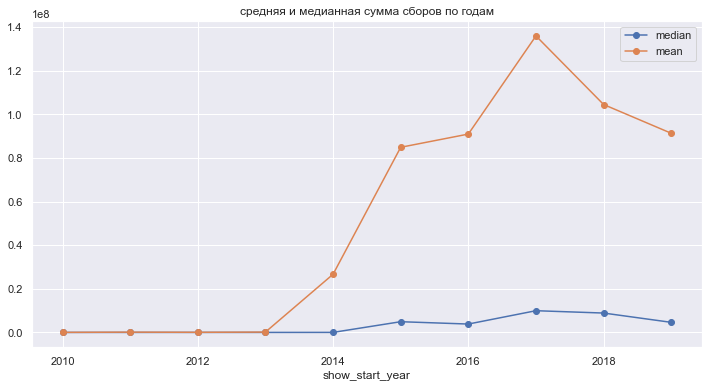

In [69]:
#посчитали мы это ранее, теперь построим график:
data_pivot.plot(title='средняя и медианная сумма сборов по годам', 
                kind='line',style='o-', y=['median', 'mean'], grid=True, figsize=(12,6))
plt.show()

Видим, что для сборов очень большой разброс данных, это видно из разницы между средней и медианой. Это означает, что в данных присутствуют значения с невероятно большими сборами по сравнению с остальными. Для кино это нормально. В среднем, самый прибыльный "кассовый" год был 2017. Это видно и по медианной и по средней сумме сборов.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

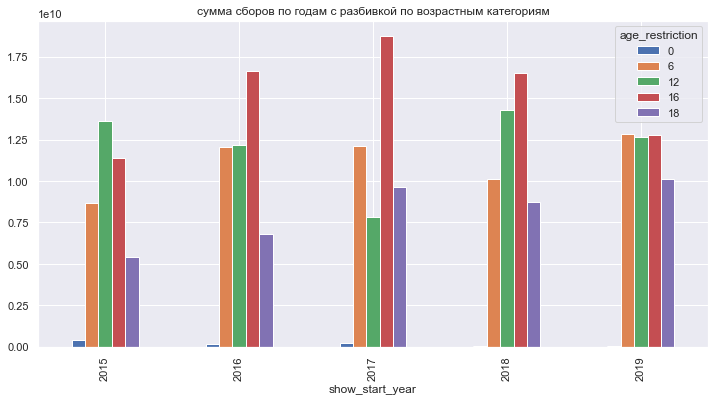

In [70]:
#построим графики зависимости сборов фильмов в прокате от возрастных ограничений аудитории с 2015 по 2019 гг.:
data.loc[(~data['box_office'].isna())&(data['show_start_year']>2014)] \
    .pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='sum') \
    .plot(title='сумма сборов по годам с разбивкой по возрастным категориям', kind='bar', 
          grid=True, figsize=(12,6))
plt.show()

По графику видно, что почти во все годы лидирует по сборам кино 16+, в 2015 в лидерах кино 12+, а в 2019 с небольшим отрывом - 6+.

(-1000000.0, 170000000.0)

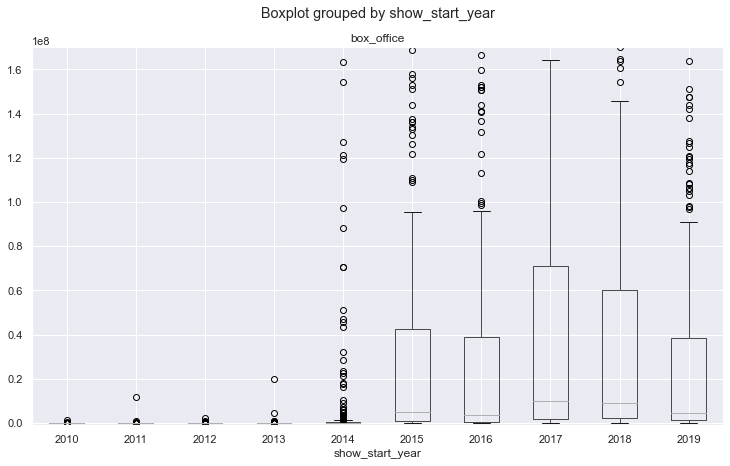

In [138]:
data.boxplot(column=['box_office'], by='show_start_year')

plt.ylim(-1000000, 170000000) 

#### Вывод
- Доля фильмов, для которых есть информация о сборах: 42.19%;
- Общая динамика выхода фильмов по годам является положительной. В 2017 году заметен небольшой спад, затем снова рост. Больше всего фильмов вышло в 2016 и 2019 гг.;
- В 2010 году сумма сборов была минимальной, а в 2018 максимальной;
- Самый прибыльный "кассовый" год был 2017. Это видно и по медианной и по средней сумме сборов по годам;
- Почти во все годы лидирует по сборам кино 16+, в 2015 г. в лидерах кино 12+, а в 2019 г. с небольшим отрывом - 6+.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Создадим новую таблицу с фильмами, которые получили государственную поддержку, т.е. столбец budget > 0:

In [72]:
data_state_support = data.query('budget > 0')

In [73]:
#добавим столбцы в новую таблицу, необходимую для рассчетов:
#столбец с суммой полной господдержки:
data_state_support['full_support'] = data_state_support[['nonrefundable_support', 'refundable_support']].sum(axis=1)
#столбец с рентабельностью господдержки:
data_state_support['profitability'] = data_state_support['box_office'] / data_state_support['budget'] - 1
#столбец с рентабельностью господдержки:
data_state_support['net_profit'] = data_state_support['box_office'] - data_state_support['budget']

In [74]:
data_state_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,support_percentage,show_start_year,main_director,main_genres,full_support,profitability,net_profit
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0.00,...,8.10,"драма,мелодрама","365,353.60",0.33,2013,А.Атанесян,драма,"26,500,000.00",-1.00,"-79,046,546.40"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12,0.00,...,NaN,NaN,"28,140.00",0.70,2014,А.Якимчук,NaN,"26,000,000.00",-1.00,"-37,114,717.00"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0.00,...,5.30,"комедия,фантастика","19,957,031.50",0.61,2013,Р.Давлетьяров,комедия,"107,847,945.00",-0.89,"-156,066,458.50"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16,0.00,...,4.20,драма,"55,917.50",0.69,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,"28,000,000.00",-1.00,"-40,518,222.50"
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0.00,...,6.40,драма,"232,100.00",0.62,2014,М.Угаров,драма,"25,000,000.00",-0.99,"-39,783,022.00"


Создадим функцию для определения окупаемости фильма, где 1 - фильм окупился, а 0 - не окупился и добавим новый столбец с окупаемостью в новую таблицу:

In [75]:
def payback(row):
    box = row['box_office']
    budget = row['budget']
    
    if box > budget:
        return(1)
    else:
        return(0)
    
data_state_support['payback'] = data_state_support.apply(payback, axis=1) 

In [76]:
data_state_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,support_percentage,show_start_year,main_director,main_genres,full_support,profitability,net_profit,payback
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0.00,...,"драма,мелодрама","365,353.60",0.33,2013,А.Атанесян,драма,"26,500,000.00",-1.00,"-79,046,546.40",0
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12,0.00,...,NaN,"28,140.00",0.70,2014,А.Якимчук,NaN,"26,000,000.00",-1.00,"-37,114,717.00",0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0.00,...,"комедия,фантастика","19,957,031.50",0.61,2013,Р.Давлетьяров,комедия,"107,847,945.00",-0.89,"-156,066,458.50",0
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16,0.00,...,драма,"55,917.50",0.69,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,"28,000,000.00",-1.00,"-40,518,222.50",0
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0.00,...,драма,"232,100.00",0.62,2014,М.Угаров,драма,"25,000,000.00",-0.99,"-39,783,022.00",0


In [77]:
#посмотрим на характеристики таблицы методом describe():
data_state_support.describe()

,puNumber,age_restriction,refundable_support,nonrefundable_support,budget,ratings,box_office,support_percentage,show_start_year,full_support,profitability,net_profit,payback
count,332.00,332.00,332.00,332.00,332.00,314.00,318.00,332.00,332.00,332.00,318.00,318.00,332.00
mean,"111,593,819.10",12.55,"11,864,457.83","48,980,988.89","134,057,765.84",6.00,"132,432,420.05",inf,"2,016.72","60,845,446.72",-0.21,"-2,325,694.67",0.22
std,"5,703,031.32",4.40,"24,916,555.26","59,980,117.92","187,685,540.48",1.12,"334,837,856.99",NaN,1.64,"72,755,459.47",1.65,"314,841,957.06",0.41
min,"111,000,115.00",0.00,0.00,0.00,"9,771,388.14",1.00,"1,550.00",0.04,"2,013.00","3,000,000.00",-1.00,"-1,971,477,243.41",0.00
25%,"111,004,891.50",12.00,0.00,"25,000,000.00","46,153,971.75",5.30,"1,236,675.50",0.38,"2,015.00","25,333,750.00",-0.98,"-73,159,279.50",0.00
50%,"111,010,367.00",12.00,0.00,"30,000,000.00","74,592,550.00",6.20,"15,720,067.71",0.61,"2,017.00","35,000,000.00",-0.82,"-42,585,869.50",0.00
75%,"111,017,815.75",16.00,"15,000,000.00","40,375,000.00","150,002,143.25",6.70,"106,373,008.27",0.66,"2,018.00","60,000,000.00",-0.10,"-10,041,252.16",0.00
max,"214,010,116.00",18.00,"180,000,000.00","400,000,000.00","2,305,074,303.00",8.50,"3,073,568,690.79",inf,"2,019.00","500,000,000.00",18.21,"2,913,568,690.79",1.00


In [78]:
#выведем матрицу корреляции:
data_state_support.corr()

,puNumber,age_restriction,refundable_support,nonrefundable_support,budget,ratings,box_office,support_percentage,show_start_year,full_support,profitability,net_profit,payback
puNumber,1.00,-0.23,0.01,-0.03,-0.01,0.04,0.05,-0.00,-0.02,-0.02,0.03,-0.02,-0.02
age_restriction,-0.23,1.00,-0.22,-0.13,-0.20,0.00,-0.17,0.15,-0.01,-0.18,-0.07,-0.05,-0.08
refundable_support,0.01,-0.22,1.00,0.36,0.66,0.00,0.31,-0.03,0.09,0.64,0.16,-0.05,0.17
nonrefundable_support,-0.03,-0.13,0.36,1.00,0.63,0.14,0.46,0.12,0.12,0.95,0.09,0.13,0.14
budget,-0.01,-0.20,0.66,0.63,1.00,0.10,0.38,-0.30,0.16,0.75,0.09,-0.18,0.11
ratings,0.04,0.00,0.00,0.14,0.10,1.00,0.16,-0.02,0.04,0.12,0.07,0.10,0.06
box_office,0.05,-0.17,0.31,0.46,0.38,0.16,1.00,-0.12,0.12,0.49,0.79,0.84,0.54
support_percentage,-0.00,0.15,-0.03,0.12,-0.30,-0.02,-0.12,1.00,-0.07,0.09,-0.11,0.06,-0.07
show_start_year,-0.02,-0.01,0.09,0.12,0.16,0.04,0.12,-0.07,1.00,0.13,0.11,0.03,0.03
full_support,-0.02,-0.18,0.64,0.95,0.75,0.12,0.49,0.09,0.13,1.00,0.13,0.09,0.17


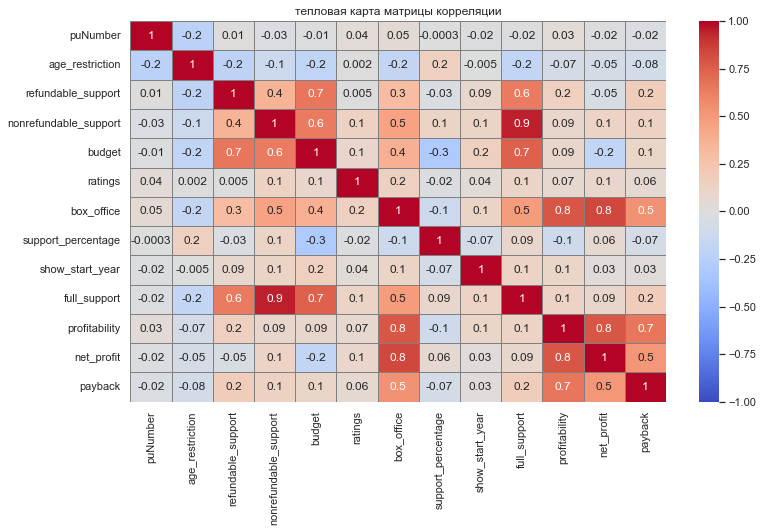

In [79]:
#посмотрим еще тепловую карту по таблице с кореляцией - так нагляднее:
sns.set(rc = {'figure.figsize':(12,7)}) #настроим размер тепловой карты
ax = plt.axes()
sns.heatmap(data_state_support.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm', linewidths=1, linecolor='gray', ax = ax)
ax.set_title('тепловая карта матрицы корреляции')
plt.show()

По табличке корреляции можно увидеть, что с поддержкой растет и бюджет, что логично). А вот на рейтинг сумма поддержки не влияет.

Теперь сделаем сводную таблицу окупаемости фильмов, получивших господдержку по жанрам, где будут три столбца:
- Общее количество фильмов, получивших господдержку по жанрам;
- Количество окупившихся фильмов по жанрам (сумма единичек и будет количеством окупившихся фильмов);
- Соотношение окупившихся фильмов к общему.

In [80]:
genres_pivot = data_state_support.pivot_table(index='main_genres', values='payback', aggfunc=['count','sum'])
genres_pivot.columns = ['payback_count', 'payback_sum']
genres_pivot['payback_ratio'] = (genres_pivot['payback_sum'] / genres_pivot['payback_count']).round(2)
genres_pivot.sort_values(by='payback_ratio', ascending=False)

,payback_count,payback_sum,payback_ratio
main_genres,,,
спорт,3,2,0.67
семейный,7,3,0.43
комедия,74,29,0.39
биография,3,1,0.33
военный,9,3,0.33
боевик,6,2,0.33
ужасы,10,3,0.30
мультфильм,31,8,0.26
история,4,1,0.25


Построим графики:

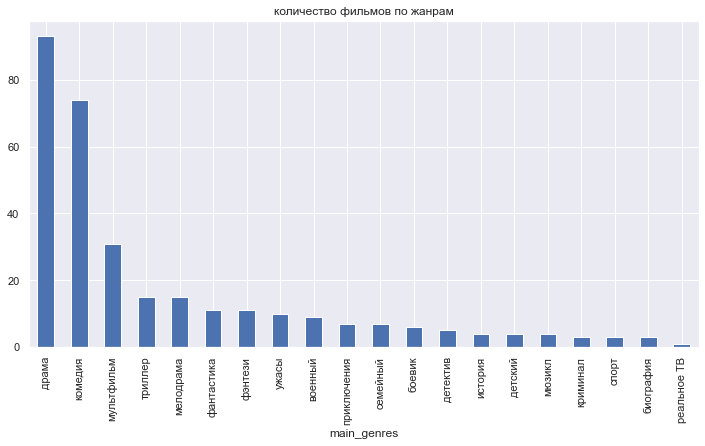

In [81]:
genres_pivot['payback_count'].sort_values(ascending=False)\
.plot(title='количество фильмов по жанрам', kind='bar', grid=True, figsize=(12,6))
plt.show()

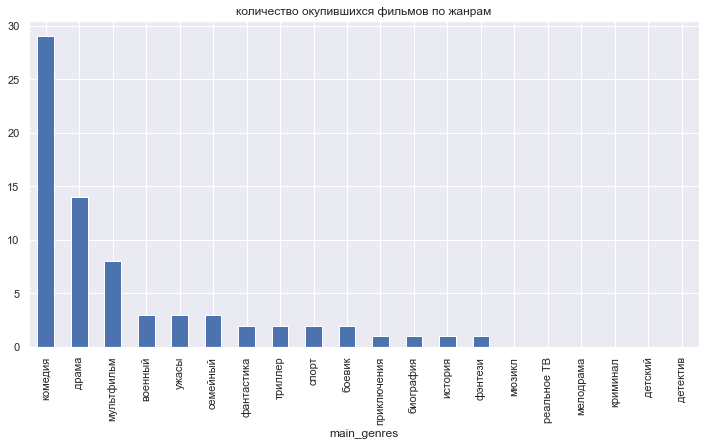

In [82]:
genres_pivot['payback_sum'].sort_values(ascending=False)\
.plot(title='количество окупившихся фильмов по жанрам', kind='bar', grid=True, figsize=(12,6))
plt.show()

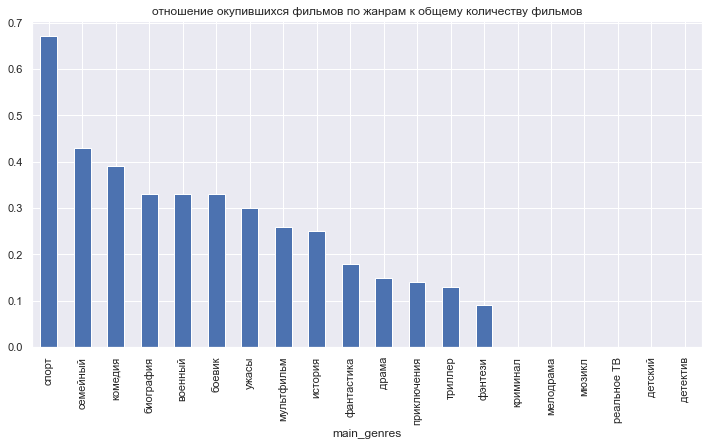

In [83]:
genres_pivot['payback_ratio'].sort_values(ascending=False)\
.plot(title='отношение окупившихся фильмов по жанрам к общему количеству фильмов', kind='bar', grid=True, figsize=(12,6))
plt.show()

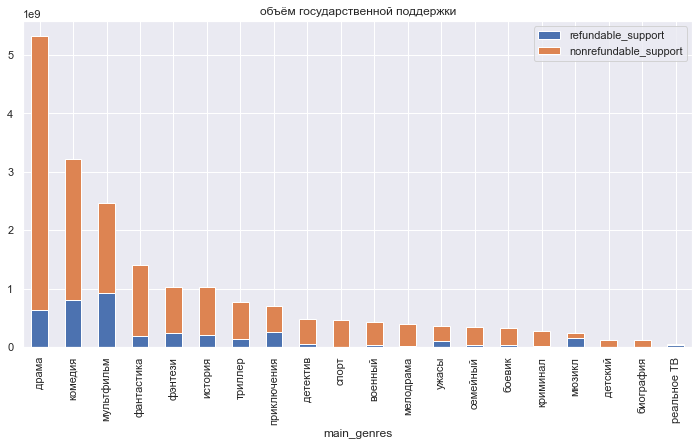

In [84]:
#посмотрим на объемы господдержки по жанрам:
data_state_support.groupby('main_genres').agg('sum').sort_values(by='full_support', ascending=False) \
            .plot(title='объём государственной поддержки', kind='bar', stacked=True, grid=True, figsize=(12,6), 
                  y=['refundable_support', 'nonrefundable_support'])
plt.show()

- Топ 3 по окупаемости - это жанры спорт (0.67), семейный (0.43), комедия (0.39);
- Средняя окупаемость у жанров военный (0.33), биография (0.33), боевик (0.33), ужасы (0.3) и мульфильм (0.26);
- Топ провалов по окупаемости среди жанров - это криминал, мелодрама, мюзикл, реальное ТВ, детский, детектив.	

In [85]:
#посмотрим на объемы господдержки по жанрам:
genres_pivot_full_support = data_state_support.pivot_table(index='main_genres', values='full_support', aggfunc=['count','sum'])\
                                              .sort_values(by=('sum', 'full_support'), ascending=False)


genres_pivot_full_support

,count,sum
,full_support,full_support
main_genres,,
драма,93,"5,314,406,632.00"
комедия,74,"3,218,282,945.00"
мультфильм,31,"2,461,520,000.00"
фантастика,11,"1,406,000,000.00"
фэнтези,11,"1,032,900,000.00"
история,4,"1,020,000,000.00"
триллер,15,"769,645,285.00"
приключения,7,"696,000,000.00"


In [86]:
genres_pivot_full_support.index

Index(['драма', 'комедия', 'мультфильм', 'фантастика', 'фэнтези', 'история',
       'триллер', 'приключения', 'детектив', 'спорт', 'военный', 'мелодрама',
       'ужасы', 'семейный', 'боевик', 'криминал', 'мюзикл', 'детский',
       'биография', 'реальное ТВ'],
      dtype='object', name='main_genres')

In [87]:
#создадим новую строку с суммами самых меньших групп жанров, для удобства визуализации на круговой диаграмме: 
genres_pivot_full_support

,count,sum
,full_support,full_support
main_genres,,
драма,93,"5,314,406,632.00"
комедия,74,"3,218,282,945.00"
мультфильм,31,"2,461,520,000.00"
фантастика,11,"1,406,000,000.00"
фэнтези,11,"1,032,900,000.00"
история,4,"1,020,000,000.00"
триллер,15,"769,645,285.00"
приключения,7,"696,000,000.00"


In [88]:
n = genres_pivot_full_support.loc['детский':]
n

,count,sum
,full_support,full_support
main_genres,,
детский,4,"119,000,000.00"
биография,3,"112,510,000.00"
реальное ТВ,1,"53,000,000.00"


In [89]:
n.loc['детский+биография+реальное ТВ',:]= n.sum(axis=0)
n

,count,sum
,full_support,full_support
main_genres,,
детский,4.00,"119,000,000.00"
биография,3.00,"112,510,000.00"
реальное ТВ,1.00,"53,000,000.00"
детский+биография+реальное ТВ,8.00,"284,510,000.00"


In [90]:
n_1 = n.loc['детский+биография+реальное ТВ':]

In [91]:
new = genres_pivot_full_support.loc['драма':'мюзикл']

In [92]:
genres_pivot_full_support = new.append(n_1)

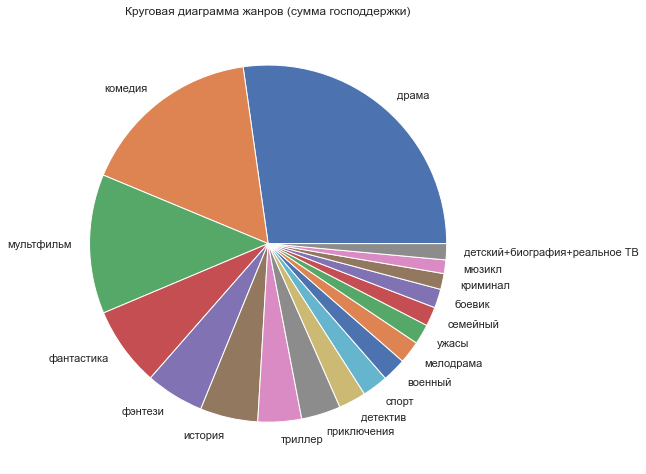

In [93]:
#построим круговую диаграмму - какие жанры больше всего получали господдержку (уж очень хотелось куда-то применить pie)):
genres_pivot_full_support[('sum', 'full_support')].plot(kind='pie', figsize=(8,30))
plt.title('Круговая диаграмма жанров (сумма господдержки)')
plt.ylabel('')
plt.show()

Самые финансируемые - драма, комедия, мультфильм.

In [94]:
#посмотрим на окупаемость по возрастным ограничениям:
data_state_support.pivot_table(index='age_restriction', values='payback', aggfunc=['count','sum', 'mean']) \
                  .sort_values(by=('mean', 'payback'), ascending=False).round(2)

,count,sum,mean
,payback,payback,payback
age_restriction,,,
12,106,30,0.28
6,65,17,0.26
16,125,23,0.18
0,8,1,0.12
18,28,2,0.07


- Больше всего окупаются фильмы в категории 12+ (0.28) и 6+ (0.26)
- Фильмы в категории 18+ практически не окупаются (0.07)

In [95]:
#посмотрим средний рейтинг фильмов по жанрам:
data_state_support[['main_genres', 'ratings']] \
        .groupby('main_genres').agg('mean').sort_values(by='ratings', ascending=False).round(2)

,ratings
main_genres,
криминал,7.50
детский,7.12
спорт,6.93
биография,6.90
детектив,6.76
боевик,6.58
мюзикл,6.55
военный,6.47
драма,6.39


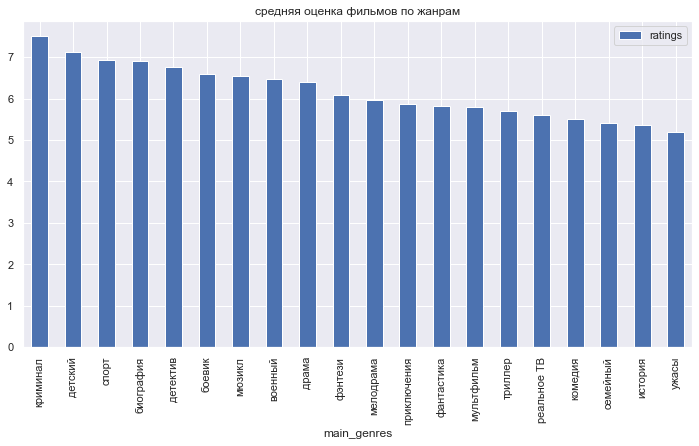

In [96]:
#посмотрим средний рейтинг фильмов по жанрам:
data_state_support[['main_genres', 'ratings']].groupby('main_genres').agg('mean').sort_values(by='ratings', ascending=False) \
                .plot(title='средняя оценка фильмов по жанрам', kind='bar', grid=True, figsize=(12,6),)
plt.show()

Самые высокие рейтинги у *криминала, детских и спорта*, самые низкие рейтинги, как ни странно у *семейных, истории и ужасов*.

In [97]:
#выведем отдельно коэффициент корреляции полной величины господдержки со сборами:
data_state_support['full_support'].corr(data_state_support['box_office'])

0.4889759317766

Коэффициент корреляции Пирсона = 0,49, что подтверждает наличие зависимости данных величин.

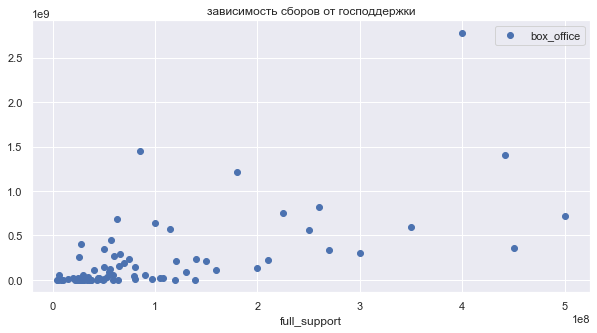

In [98]:
#с помощью сводной таблицы отобразим график зависимости 2-х величин:
data_state_support.pivot_table(index='full_support', values='box_office')\
.plot(title='зависимость сборов от господдержки', grid=True, style='o', figsize=(10, 5))
plt.show()

Можно сказать о слабой зависимости сборов от господдержки. Хотя и наблюдается некая корреляция - при росте поддержки растут и сборы.

In [99]:
#посмотрим на режиссеров и фильмы, которым выделяли наибольшую господдержку:
data_state_support.groupby(['main_director', 'title', 'ratings'])['full_support'].agg(['count', 'sum']) \
                                                            .sort_values('sum', ascending=False).head(10)

,,,count,sum
main_director,title,ratings,,
Ф.Бондарчук,Вторжение,5.70,1,"500,000,000.00"
А.Кравчук,Союз спасения,6.00,1,"500,000,000.00"
А.Мизгирев,Дуэлянт,6.60,1,"450,000,000.00"
Н.Лебедев,Экипаж .,7.60,1,"442,104,482.00"
А.Мегердичев,Движение вверх,7.50,1,"400,000,000.00"
И.Шурховецкий,Легенда о Коловрате,6.40,1,"350,000,000.00"
Н.Хомерики,Девятая,5.80,1,"300,000,000.00"
А.Учитель,Матильда,7.70,1,"300,000,000.00"
Н.Хомерики,Ледокол,6.50,1,"300,000,000.00"


In [100]:
#или так) это я для себя разными метода пробую вывести отдно и тоже):
data_state_support.pivot_table(index=['main_director', 'title', 'ratings'], values=('full_support'), aggfunc=['count', 'sum']) \
                               .sort_values(('sum', 'full_support'), ascending=False).head(10)

,,,count,sum
,,,full_support,full_support
main_director,title,ratings,,
Ф.Бондарчук,Вторжение,5.70,1,"500,000,000.00"
А.Кравчук,Союз спасения,6.00,1,"500,000,000.00"
А.Мизгирев,Дуэлянт,6.60,1,"450,000,000.00"
Н.Лебедев,Экипаж .,7.60,1,"442,104,482.00"
А.Мегердичев,Движение вверх,7.50,1,"400,000,000.00"
И.Шурховецкий,Легенда о Коловрате,6.40,1,"350,000,000.00"
Н.Хомерики,Девятая,5.80,1,"300,000,000.00"
А.Учитель,Матильда,7.70,1,"300,000,000.00"


In [101]:
#посмотрим на режиссеров и фильмы, которые имели большую окупаемость:
data_state_support.groupby(['main_director', 'title', 'ratings'])['net_profit'].agg(['count', 'sum']) \
                           .sort_values('sum', ascending=False).head(10).astype(int)

,,,count,sum
main_director,title,ratings,,
К.Шипенко,Холоп,6.80,1,-2147483648
А.Мегердичев,Движение вверх,7.50,1,-2147483648
А.Сидоров,Т-34,6.50,1,1707969287
Д.Дьяченко,Последний богатырь,6.80,1,1302560113
Н.Лебедев,Экипаж .,7.60,1,766971523
Д.Киселев,Ёлки Новые,5.80,1,681069130
Ф.Бондарчук,Притяжение (2016),5.60,1,631180316
К.Феоктистов,Три богатыря и принцесса Египта,5.50,1,584762378
А.Першин (псевдоним Ж.Крыжовников),Самый Лучший День,4.70,1,552409725


Вывод - Бондарчук - молодец!) Вторжение, Притяжение, ....Брожение, Глажение, Сложение...) Так, о чем это я?!) Больше всего поддержки получил Федор Бондарчук. При господдержке он снял две кинокартины. Но данные о выручке есть только по одной. Это фильм "Притяжение". Хотя рейтинг совсем не высокий - меньше 6 балов. Победами можно назвать фильмы А.Мегердичев "Движение вверх" и Н.Лебедева "Экипаж".  И заработали денег, и имеют вполне хорошую оценку (7.5-7.6). Самая прибыльный фильм - "Холоп" режиссера К.Шипенко.

#### Вывод
- Топ 3 по окупаемости - это жанры спорт (0.67), семейный (0.43), комедия (0.39);
- Средняя окупаемость у жанров военный (0.33), биография (0.33), боевик (0.33), ужасы (0.3) и мульфильм (0.26);
- Топ провалов по окупаемости среди жанров - это криминал, мелодрама, мюзикл, реальное ТВ, детский, детектив;
- Самые финансируемые - драма, комедия, мультфильм;
- Больше всего окупаются фильмы в категории 12+ (0.28) и 6+ (0.26);
- Фильмы в категории 18+ практически не окупаются (0.07);
- Можно сказать о слабой зависимости сборов от господдержки. Хотя и наблюдается некая корреляция - при росте поддержки растут и сборы.
- Победами можно назвать фильмы А.Мегердичев "Движение вверх" и Н.Лебедева "Экипаж".  И заработали денег, и имеют вполне хорошую оценку (7.5-7.6);
- Самый прибыльный фильм - "Холоп" режиссера К.Шипенко.

### Шаг 5. Напишите общий вывод

## Вывод
Данные содержат много ошибок:

- Лишние пробелы в категориальных переменных и столбце с номерами прокатных удостоверений **puNumber** - исправлено;
- Рейтинги в процентах в столбце **ratings** - такие значения приведены к NaN;
- В датасете есть дубликаты по названию фильма, но у этих кинокартин разные номера прокатных удостоверений, поэтому оставили данные без доп. обработки; 
- Также есть фильмы с одинаковыми номерами прокатных удостоверений, но, проверив, такие фильмы на официальном сайте, подтвердили, что все так и есть. Видимо, под одним номером может быть в прокате несколько фильмов; 
- В бюджете фильмов были нулевые значения. В таких строках нулевой бюджет заменили на сумму поддержки с учетом медианы доли участия государства в бюджете;


Для анализа добавили дополнительные столбцы с годом старта показа картины, первого в списке режиссера, и первого в списке жанра, а также отношение суммы поддержки к бюджету. Доля фильмов, для которых есть информация о сборах: 42.19%.


- Общая динамика выхода фильмов по годам является положительной. В *2017* году заметен небольшой спад, затем снова рост. Больше всего фильмов вышло в *2016* и *2019* гг.;
- В *2010* году сумма сборов была минимальной, а в *2018* максимальной;
- Самый прибыльный "кассовый" год был *2017*. Это видно и по медианной и по средней сумме сборов по годам;
- Почти во все годы лидирует по сборам кино *16+*, в *2015* г. в лидерах кино *12+*, а в *2019* г. с небольшим отрывом - *6+*; 
- Топ 3 по окупаемости - это жанры *спорт* (0.67), *семейный* (0.43), *комедия* (0.39);
- Средняя окупаемость у жанров *военный* (0.33), *биография* (0.33), *боевик* (0.33), *ужасы* (0.3) и *мульфильм* (0.26);
- Топ провалов по окупаемости среди жанров - это *криминал*, *мелодрама*, *мюзикл*, *реальное ТВ*, *детский*, *детектив*;
- Самые высокие рейтинги у *криминала (7.50), детских (7.12) и спорта (6.93)*, самые низкие рейтинги, как ни странно у *семейных (5.41), истории (5.35) и ужасов (5.20)*.
- Самую большую сумму поддержки получил **Федор Бондарчук**;
- Самые финансируемые - *драма, комедия, мультфильм*;
- Больше всего окупаются фильмы в категории *12+* (0.28) и *6+* (0.26);
- Фильмы в категории *18+* практически не окупаются (0.07);
- Можно сказать о слабой зависимости сборов от господдержки. Хотя и наблюдается некая корреляция - при росте поддержки растут и сборы.
- Победами можно назвать фильмы **А.Мегердичева "Движение вверх"** и **Н.Лебедева "Экипаж"**. И заработали денег, и имеют хороший рейтинг (7.5-7.6);
- Самый прибыльный фильм - **"Холоп"** режиссера **К.Шипенко**.

**Отвечая на вопрос: "Какие фильмы интересны зрителю?" можно сказать, что это фильмы жанров спорт, семейный и комедия в возрастной категории 6+ и 12+.**

Наименее интересными жанрами являются *мелодрама, фэнтези* и *триллер*. Фильмы в жанре *детективы, детские, мюзиклы* и *криминальные* так же не окупаются.

**Кроме того, мы увидели, что размер государственного финансирования мало влияет на окупаемость фильма, совсем не влияет на рейтинг, а соответственно и на интерес зрителя.**

В общем, хотите прибыли - снимайте комедию с возрастным цензом 12+ :)